In [45]:
import pandas as pd

In [46]:
from matplotlib import pyplot as plt

In [47]:
df = pd.read_csv("copertura-vaccinale.csv", sep=",")

In [71]:
df = df.loc [:, [ "fascia_anagrafica", "guariti", "vaccinati"]]

In [72]:
df = df.sort_values(by="guariti")

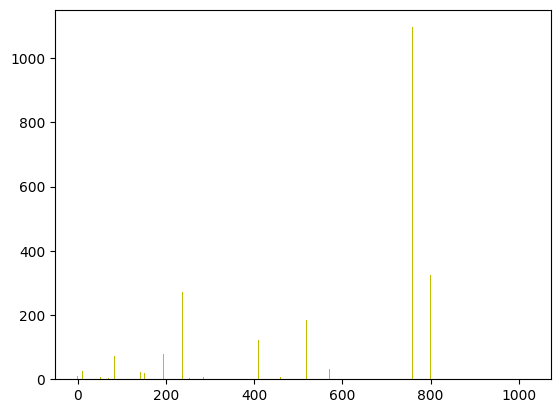

In [73]:
plt.bar(df["guariti"], df ["vaccinati"],color="y")
plt.show()

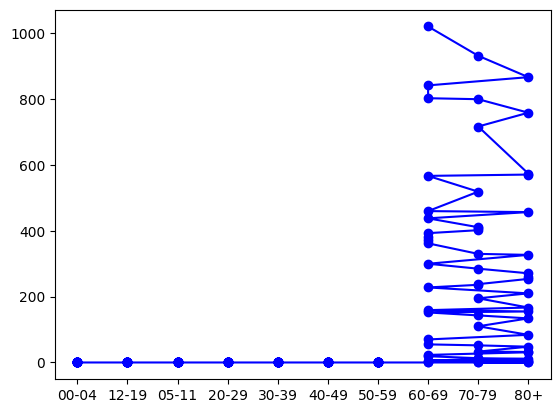

In [74]:
plt.plot(df["fascia_anagrafica"],df["guariti"],marker="o", color="b")
plt.show()


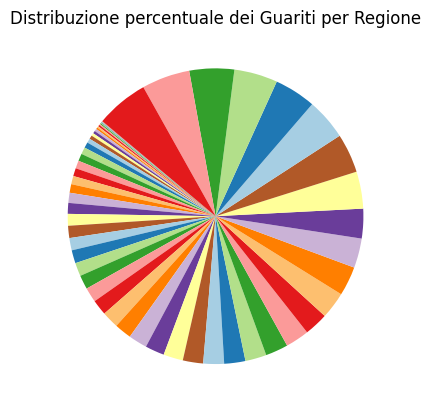

In [75]:

plt.pie(df["guariti"], startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribuzione percentuale dei Guariti per Regione")
plt.show()
